In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### 用户基本信息表

In [2]:
# 训练集
user_info_cloumns = ['user_id', 'sex', 'occupation', 'education', 'marriage', 'household_type']
user_info = pd.read_table("../data/train/user_info_train.txt", names=user_info_cloumns, sep=',')

# 测试集
user_info_test = pd.read_table("../data/test/user_info_test.txt", names=user_info_cloumns, sep=',')

### 银行流水记录表

In [3]:
# 训练集
bank_detail = pd.read_table("../data/train/bank_detail_train.txt", sep=',')
bank_detail.rename(columns={'uid':'user_id', 'timespan':'time', 'type':'deal_type', 
                            'amount':'deal_amount', 'markup':'wage_type'}, inplace=True)

# 测试集
bank_detail_columns = ['user_id', 'time', 'deal_type', 'deal_amount', 'wage_type']
bank_detail_test = pd.read_table("../data/test/bank_detail_test.txt", names=bank_detail_columns, sep=',')

### 用户浏览记录表

In [4]:
# 训练集
browse_history_columns = ['user_id', 'time', 'browse_behavior', 'browse_subbehavior']
browse_history = pd.read_table("../data/train/browse_history_train.txt", names=browse_history_columns, sep=',')

# 测试集
browse_history_test = pd.read_table("../data/test/browse_history_test.txt", names=browse_history_columns, sep=',')

### 信用卡账单记录表

In [5]:
# 训练集
bill_detail_columns = ['user_id', 'time', 'bank_id', 'previous_bills', 'previous_repayment', 'creditCardQuota', 
                       'current_balance', 'current_MinRepay', 'consume_times', 'current_bills', 'adjust_money',
                       'revolving_interest', 'available_money', 'cash_Advance_Limit', 'repayment_status']
bill_detail = pd.read_table("../data/train/bill_detail_train.txt", names=bill_detail_columns, sep=',')

# 测试集
bill_detail_test = pd.read_table("../data/test/bill_detail_test.txt", names=bill_detail_columns, sep=',')

### 放款时间信息表

In [6]:
# 训练集
loan_time_columns = ['user_id', 'time']
loan_time = pd.read_table("../data/train/loan_time_train.txt", names=loan_time_columns, sep=',')

# 测试集
loan_time_test = pd.read_table("../data/test/loan_time_test.txt", names=loan_time_columns, sep=',')

### 用户逾期记录表 

In [7]:
# 训练集
overdue_columns = ['user_id', 'isOverdue']
overdue = pd.read_table("../data/train/overdue_train.txt", names=overdue_columns, sep=',')

# 测试集（预测标签）
overdue_pred = pd.read_table("../data/test/usersID_test.txt", names=['user_id'], sep=',')

# EDA

### 时间数据脱敏还原

In [99]:
# import time

# table_names = [bank_detail, browse_history, bill_detail, loan_time]

# for value in table_names:
#     value['year'] = value['time'].apply(lambda x: int(time.strftime("%Y", time.localtime(x))))
#     value['month'] = value['time'].apply(lambda x: int(time.strftime("%m", time.localtime(x))))
#     value['day'] = value['time'].apply(lambda x: int(time.strftime("%d", time.localtime(x))))
#     value.drop('time', axis=1, inplace=True)

In [131]:
# 时间戳单位为秒，量级太大，转化为天

table_names = [bank_detail, browse_history, bill_detail, loan_time]
for value in table_names:
    value['time'] = value['time'] // 86400

### 合并user_info、bill_detail、loan_time、overdue四张表

In [ ]:
#　训练集
bill_detail = pd.merge(bill_detail, loan_time, how='inner', on='user_id')
overdue = pd.merge(overdue, user_info, how='inner', on='user_id')
overdue = pd.merge(overdue, loan_time, how='inner', on='user_id')

# 测试集
bill_detail_test = pd.merge(bill_detail_test, loan_time_test, how='inner', on='user_id')
overdue_pred = pd.merge(overdue_pred, user_info_test, how='inner', on='user_id')
overdue_pred = pd.merge(overdue_pred, loan_time_test, how='inner', on='user_id')

### user_info表中的离散属性对应的逾期情况

In [ ]:
sex_analysis = overdue.groupby('sex', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
sex_analysis['overdue_rate'] = sex_analysis['sum'] / sex_analysis['count']
sex_analysis

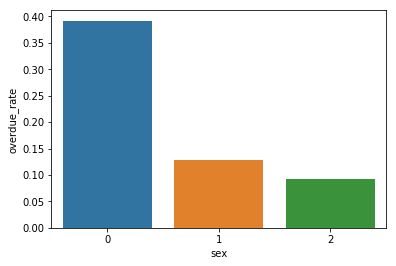

In [44]:
sns.barplot(sex_analysis['sex'], sex_analysis['overdue_rate'])
plt.show()

In [46]:
occupation_analysis = overdue.groupby('occupation', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
occupation_analysis['overdue_rate'] = occupation_analysis['sum'] / occupation_analysis['count']
occupation_analysis

,occupation,sum,count,overdue_rate
0,0,75,368,0.203804
1,1,17,93,0.182796
2,2,5204,41150,0.126464
3,3,746,5898,0.126484
4,4,1141,8087,0.141091


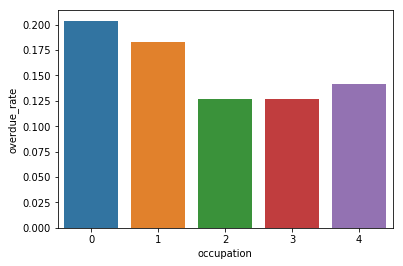

In [51]:
sns.barplot(occupation_analysis['occupation'], occupation_analysis['overdue_rate'])
plt.show()

In [48]:
education_analysis = overdue.groupby('education', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
education_analysis['overdue_rate'] = education_analysis['sum'] / education_analysis['count']
education_analysis

,education,sum,count,overdue_rate
0,0,75,369,0.203252
1,1,18,226,0.079646
2,2,813,8483,0.095839
3,3,2977,23530,0.126519
4,4,3300,22988,0.143553


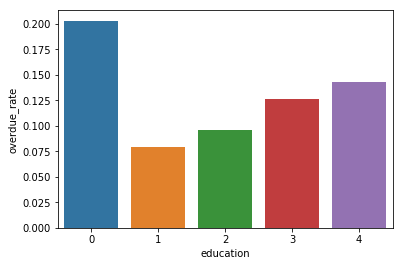

In [52]:
sns.barplot(education_analysis['education'], education_analysis['overdue_rate'])
plt.show()

In [49]:
marriage_analysis = overdue.groupby('marriage', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
marriage_analysis['overdue_rate'] = marriage_analysis['sum'] / marriage_analysis['count']
marriage_analysis

,marriage,sum,count,overdue_rate
0,0,75,370,0.202703
1,1,3169,25098,0.126265
2,2,805,6038,0.133322
3,3,2909,22554,0.128979
4,4,210,1471,0.142760
5,5,15,65,0.230769


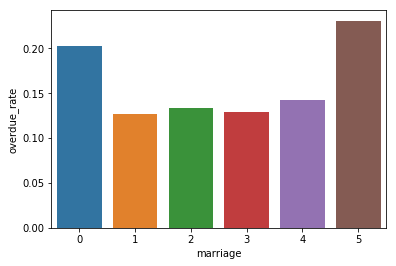

In [53]:
sns.barplot(marriage_analysis['marriage'], marriage_analysis['overdue_rate'])
plt.show()

In [50]:
household_type_analysis = overdue.groupby('household_type', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
household_type_analysis['overdue_rate'] = household_type_analysis['sum'] / household_type_analysis['count']
household_type_analysis

,household_type,sum,count,overdue_rate
0,0,75,369,0.203252
1,1,2033,17105,0.118854
2,2,2145,15557,0.137880
3,3,978,8216,0.119036
4,4,1952,14349,0.136037


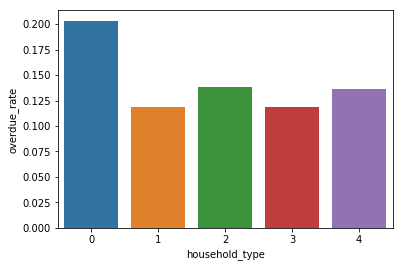

In [54]:
sns.barplot(household_type_analysis['household_type'], household_type_analysis['overdue_rate'])
plt.show()

### 银行流水记录表

In [86]:
bank_detail.shape

(6070197, 5)

In [92]:
bank_detail.loc[:, ['user_id', 'time']].nunique()

user_id       9294
time       1419542
dtype: int64

(user_id, time)联合主键，若分用户从该表中获取特征，则存在大量缺失值  

In [117]:
(bank_detail['time'].max() - bank_detail['time'].min()) // (60 * 60 * 24 * 365)

188

In [123]:
bank_detail['time'].max()

5928982961

In [124]:
bank_detail.loc[bank_detail['time'] == 5928982961, :]

,user_id,time,deal_type,deal_amount,wage_type,month,day
4386499,30825,5928982961,0,14.54507,0,11,18


In [126]:
bank_detail.loc[bank_detail['user_id'] == 30825, :]

,user_id,time,deal_type,deal_amount,wage_type,month,day
4385590,30825,5897027940,0,15.618741,0,11,13
4385591,30825,5897028325,1,15.612961,0,11,13
4385592,30825,5897119771,0,15.535492,0,11,15
4385593,30825,5897121268,1,12.706843,0,11,15
4385594,30825,5897122839,1,14.545120,0,11,15
4385595,30825,5897264484,1,12.147230,0,11,16
4385596,30825,5897264546,1,11.984712,0,11,16
4385597,30825,5897280508,1,14.855275,0,11,16
4385598,30825,5897281188,1,6.722278,0,11,16
4385599,30825,5897281463,0,12.147230,0,11,16


### 用户浏览记录表

In [67]:
browse_history.shape

(22919547, 7)

In [93]:
browse_history.loc[:, ['user_id', 'time']].nunique()

user_id     47330
time       193944
dtype: int64

(user_id, time)联合主键，少量缺失值

In [113]:
(browse_history['time'].max() - browse_history['time'].min()) // (60 * 60 * 24 * 365)

4

### 信用卡账单记录表

In [68]:
bill_detail.shape

(2338118, 18)

In [95]:
bill_detail.loc[:, ['user_id', 'time', 'bank_id']].nunique()

user_id     53174
time       518491
bank_id        29
dtype: int64

(user_id, time, bank_id)联合主键

In [127]:
(bill_detail['time'].max() - bill_detail['time'].min()) // (60 * 60 * 24 * 365)

188

### 放款时间信息表

In [69]:
loan_time.shape

(55596, 5)

In [98]:
loan_time.loc[:, ['user_id', 'time']].nunique()

user_id    55596
time         191
dtype: int64

训练集中所有用户都被发放过贷款，只是时间不同

In [129]:
(loan_time['time'].max() - loan_time['time'].min()) // (60 * 60 * 24 * 365)

0

当前结论：  
- 时间戳非线性脱敏，应该只保留了先后关系，无法提取周期性特征  
- 对于55596个用户，在部分表中存在大量缺失值  

## 训练数据构建

In [143]:
train_data = pd.merge(user_info, overdue, how='inner', on='user_id')

### 时间已知 / 放款前 用户浏览行为

In [144]:
browseAndLoan = pd.merge(browse_history, loan_time, how='left', on='user_id')

In [145]:
# 浏览记录时间 <= 放款时间，时间非0（0代表未知）
temp = browseAndLoan[(browseAndLoan['time_x'] <= browseAndLoan['time_y']) & (browseAndLoan['time_x'] > 0)]

In [146]:
# 行为是连续数值表示的类别特征
# 子行为应该是用户行为更细粒度的划分，所以将两者转化为字符串拼接，作为新特征
temp['cross_behavior'] = temp['browse_behavior'].astype(str).values + '_' + temp['browse_subbehavior'].astype(str).values

In [147]:
# 对cross_behavior进行自然数编码

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(temp['cross_behavior'])
temp['cross_behavior'] = encoder.transform(temp['cross_behavior'])

In [148]:
# 每个用户进行了多少次行为统计
to_merge = temp.groupby('user_id', as_index=False)['browse_behavior'].agg({'behavior_count': 'count'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [149]:
# 每个用户的不同行为数
to_merge = temp.groupby('user_id', as_index=False)['browse_behavior'].agg({'unique_behavior': 'nunique'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [150]:
# 每个用户的不同子行为数
to_merge = temp.groupby('user_id', as_index=False)['browse_subbehavior'].agg({'unique_subbehavior': 'nunique'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [151]:
# 每个用户的不同交叉行为数
to_merge = temp.groupby('user_id', as_index=False)['cross_behavior'].agg({'cross_behavior': 'nunique'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [152]:
temp.loc[temp['user_id'] == 2, 'browse_behavior'].mode()[0]

82

In [153]:
# # 每个用户频率最高的行为
# for uid in temp['user_id'].unique():
#     value = temp.loc[temp['user_id'] == uid, 'browse_behavior'].mode()[0]
#     train_data.loc[train_data['user_id'] == uid, 'most_frequent_beha'] = value

统计用户频率最高 / 最低的行为 / 子行为，由于特征构建速度过慢，后期再考虑

### 时间已知 / 放款前 银行流水记录

In [154]:
bank_detail['user_id'].nunique()

9294

In [155]:
bankAndLoan = pd.merge(bank_detail, loan_time, how='left', on='user_id')

In [156]:
temp = bankAndLoan.loc[(bankAndLoan['time_x'] <= bankAndLoan['time_y']) & (bankAndLoan['time_x'] > 0)]

- 收入 = 工资性收入 + 非工资性收入  
- 支出统计  
- 支出与收入的比较  
- 支出和收入的其他统计特征，如均值、方差、极差之类

#### 每个用户的收入情况

In [157]:
# 变异系数
def get_cv(arr):
    return arr.mean() / arr.std()

deal_type_0 = temp[temp['deal_type'] == 0].groupby(['user_id'], as_index=False)
income_analysis = deal_type_0['deal_amount'].agg({'income_count': 'count', 'income_sum': 'sum', 
                                                  'income_median': 'median', 'income_std': 'std',
                                                  'income_cv': get_cv})

In [158]:
train_data = train_data.merge(income_analysis, how='left', on='user_id')

#### 每个用户的支出情况

In [159]:
deal_type_1 = temp[temp['deal_type'] == 1].groupby(['user_id'], as_index=False)
expen_analysis = deal_type_1['deal_amount'].agg({'expen_count': 'count', 'expen_sum': 'sum', 
                                                 'expen_median': 'median', 'expen_std': 'std',
                                                 'expen_cv': get_cv})

In [160]:
train_data = train_data.merge(expen_analysis, how='left', on='user_id')

#### 工资性收入

In [161]:
# 若存在某条记录既是工资收入，又是支出，逻辑矛盾，归为异常数据
temp[(temp['wage_type'] == 1) & (temp['deal_type'] == 1)]

,user_id,time_x,deal_type,deal_amount,wage_type,time_y


In [162]:
wage_type_1 = temp[temp['wage_type'] == 1].groupby(['user_id'], as_index=False)
wage_income = wage_type_1['deal_amount'].agg({'wages_count': 'count', 'wages_sum': 'sum'})

- 绝大部分用户缺失，是没有统计到，还是没有工资性收入？  
- 是否有工资性收入应该是个强特

In [163]:
train_data = train_data.merge(wage_income, how='left', on='user_id')

#### 非工资性收入

In [164]:
wage_type_0 = temp[(temp['wage_type'] == 0) & (temp['deal_type'] == 0)].groupby(['user_id'], as_index=False)
non_wage_income = wage_type_0['deal_amount'].agg({'non_wages_sum': 'sum', 'non_wages_median': 'median', 
                                                  'non_wages_std': 'std', 'non_wages_cv': get_cv})

In [165]:
train_data = train_data.merge(non_wage_income, how='left', on='user_id')

#### 平均每笔收入

In [166]:
train_data['per_income'] = train_data['income_sum'] / train_data['income_count']

#### 平均每笔支出

In [167]:
train_data['per_expen'] = train_data['expen_sum'] / train_data['expen_count']

### 时间已知 / 放款前 信用卡账单

In [168]:
bill_detail['user_id'].nunique()

53174

In [169]:
billAndLoan = bill_detail.merge(loan_time, how='left', on='user_id')

In [170]:
temp = billAndLoan.loc[(billAndLoan['time_x'] <= billAndLoan['time_y']) & (billAndLoan['time_x'] > 0)]

In [171]:
temp['repayment_status'].value_counts()

0    1533504
1        199
Name: repayment_status, dtype: int64

极少数人是非欠款状态

In [172]:
billAndLoan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338118 entries, 0 to 2338117
Data columns (total 16 columns):
user_id               int64
time_x                int64
bank_id               int64
previous_bills        float64
previous_repayment    float64
creditCardQuota       float64
current_balance       float64
current_MinRepay      float64
consume_times         int64
current_bills         float64
adjust_money          float64
revolving_interest    float64
available_money       float64
cash_Advance_Limit    float64
repayment_status      int64
time_y                int64
dtypes: float64(10), int64(6)
memory usage: 303.3 MB


In [173]:
ccards_num = temp.groupby(['user_id'], as_index=False)['bank_id'].agg({'bank_num': 'nunique'})
train_data = train_data.merge(ccards_num, how='left', on='user_id')

In [174]:
to_merge = temp.groupby(['user_id'], as_index=False)['previous_bills'].agg({'previous_bills_count': 'count', 
                                                                            'previous_bills_sum': 'sum', 
                                                                            'previous_bills_median': 'median', 
                                                                            'previous_bills_std': 'std', 
                                                                            'previous_bills_max': 'max', 
                                                                            'previous_bills_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [175]:
to_merge = temp.groupby(['user_id'], as_index=False)['previous_repayment'].agg({'previous_repayment_sum': 'sum', 
                                                                                'previous_repayment_median': 'median', 
                                                                                'previous_repayment_std': 'std', 
                                                                                'previous_repayment_max': 'max', 
                                                                                'previous_repayment_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [176]:
to_merge = temp.groupby(['user_id'], as_index=False)['creditCardQuota'].agg({'creditCardQuota_mean': 'mean', 
                                                                             'creditCardQuota_max': 'max', 
                                                                             'creditCardQuota_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [178]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_balance'].agg({'current_balance_mean': 'mean', 
                                                                             'current_balance_sum': 'sum'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [179]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_MinRepay'].agg({'current_MinRepay_mean': 'mean', 
                                                                              'current_MinRepay_sum': 'sum'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [180]:
# 极差
def get_ptp(arr):
    return arr.max() - arr.min()

to_merge = temp.groupby(['user_id'], as_index=False)['consume_times'].agg({'consume_times_median': 'median', 
                                                                           'consume_times_sum': 'sum', 
                                                                           'consume_times_ptp': get_ptp})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [181]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_bills'].agg({'current_bills_sum': 'sum', 
                                                                           'current_bills_median': 'median', 
                                                                           'current_bills_std': 'std', 
                                                                           'current_bills_max': 'max', 
                                                                           'current_bills_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [182]:
to_merge = temp.groupby(['user_id'], as_index=False)['adjust_money'].agg({'adjust_money_mean': 'mean', 
                                                                          'adjust_money_sum': 'sum', 
                                                                          'adjust_money_max': 'max',
                                                                          'adjust_money_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [183]:
to_merge = temp.groupby(['user_id'], as_index=False)['revolving_interest'].agg({'revolving_interest_mean': 'mean', 
                                                                                'revolving_interest_sum': 'sum', 
                                                                                'revolving_interest_max': 'max',
                                                                                'revolving_interest_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [184]:
to_merge = temp.groupby(['user_id'], as_index=False)['available_money'].agg({'available_money_sum': 'sum', 
                                                                             'available_money_median': 'median', 
                                                                             'available_money_std': 'std', 
                                                                             'available_money_max': 'max', 
                                                                             'available_money_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [185]:
to_merge = temp.groupby(['user_id'], as_index=False)['cash_Advance_Limit'].agg({'cash_Advance_Limit_mean': 'mean', 
                                                                                'cash_Advance_Limit_max': 'max'})
train_data = train_data.merge(to_merge, how='left', on='user_id')